### NLP and Supervised Learning
### Classification of Text Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/airline_tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline', ylabel='count'>

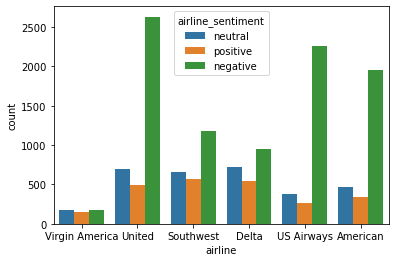

In [5]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

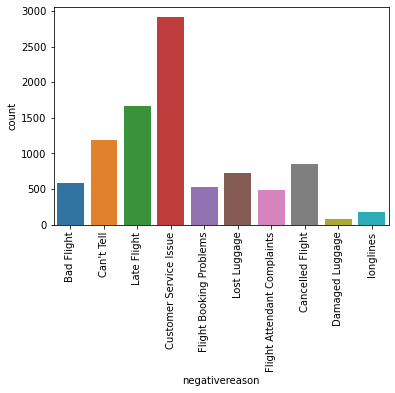

In [6]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

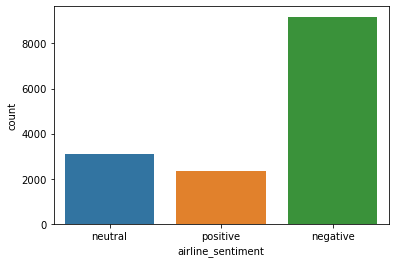

In [7]:
sns.countplot(data=df,x='airline_sentiment')

### Features and Labels

In [8]:
data = df[['airline_sentiment','text']]

In [9]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
y = df['airline_sentiment']
X = df['text']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
tfidf = TfidfVectorizer(stop_words='english')

In [20]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [21]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
X_train_tfidf

<11712x12987 sparse matrix of type '<class 'numpy.float64'>'
	with 106745 stored elements in Compressed Sparse Row format>

### Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [26]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [27]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [28]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.15      0.25       580
    positive       0.94      0.18      0.31       459

    accuracy                           0.70      2928
   macro avg       0.79      0.44      0.46      2928
weighted avg       0.74      0.70      0.62      2928



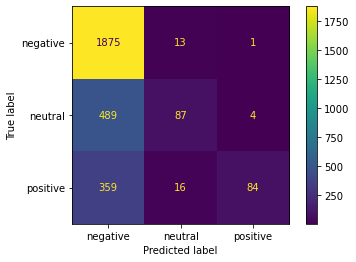

In [29]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.66      0.48      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



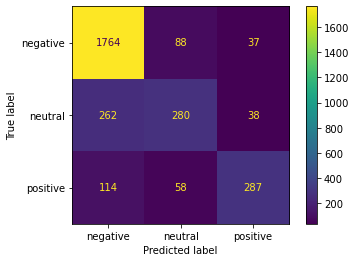

In [30]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.64      0.54      0.58       580
    positive       0.76      0.67      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



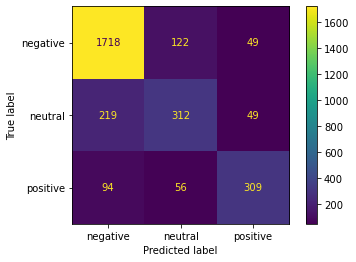

In [31]:
print('SVC')
report(svc)

### Finalizing a PipeLine for Deployment on New Tweets

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [34]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [35]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [36]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [37]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)